<a href="https://colab.research.google.com/github/yashgadiwan/skill/blob/main/SKILL_LCA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing The Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading The Dataset

In [ ]:
data=pd.read_csv('/content/data_1.csv')

# Data Information

In [ ]:
data.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2.0,2.0,120.0,120.0,0.002508,0.000836,0.000836,0.0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5.0,5.0,350.0,330.0,0.006190,0.002751,0.002751,0.0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1.0,1.0,90.0,90.0,20.590960,0.000000,0.000000,0.0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5.0,5.0,210.0,300.0,0.006189,0.002751,0.002751,0.0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2.0,2.0,174.0,456.0,0.005264,0.001755,0.001755,0.0,Normal,Normal


In [ ]:
data.tail()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
15596,15597,1.526345e+09,e,tcp,192.168.100.149,55267,192.168.100.3,7106,2,120,...,1.0,1.0,60.0,60.0,11494.252930,0.0,0.0,1.0,Reconnaissance,Service_Scan
15597,15598,1.526345e+09,e,tcp,192.168.100.149,55267,192.168.100.3,4111,2,120,...,1.0,1.0,60.0,60.0,11363.636719,0.0,0.0,1.0,Reconnaissance,Service_Scan
15598,15599,1.526345e+09,e,tcp,192.168.100.149,55267,192.168.100.3,8087,2,120,...,1.0,1.0,60.0,60.0,16666.667969,0.0,0.0,1.0,Reconnaissance,Service_Scan
15599,15600,1.526345e+09,e,tcp,192.168.100.149,55267,192.168.100.3,8022,2,120,...,1.0,1.0,60.0,60.0,16666.667969,0.0,0.0,1.0,Reconnaissance,Service_Scan
15600,15601,1.526345e+09,e,tcp,192.168.100.149,55267,192.168.100.3,5061,2,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,pkSeqID,stime,pkts,bytes,ltime,seq,dur,mean,stddev,smac,...,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
count,15601.00000,1.560100e+04,15601.000000,1.560100e+04,1.560100e+04,15601.000000,15601.000000,15601.000000,15601.000000,0.0,...,0.0,0.0,15600.000000,15600.000000,1.560000e+04,1.560000e+04,15600.000000,15600.000000,15600.000000,15600.000000
mean,7801.00000,1.526345e+09,16.028652,1.287116e+04,1.526345e+09,8040.436254,2.550227,0.006512,0.000280,NaN,...,NaN,NaN,11.714167,4.315385,8.928659e+03,3.943314e+03,12599.141792,113.258575,9.061986,0.993846
std,4503.76511,4.210736e+02,783.436587,7.659612e+05,4.215574e+02,4718.376326,57.057205,0.138681,0.012342,NaN,...,NaN,NaN,523.073049,336.782181,4.868892e+05,3.454974e+05,61507.618567,3604.350162,512.263732,0.078207
min,1.00000,1.526344e+09,1.000000,6.000000e+01,1.526344e+09,1.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,0.000000,4.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3901.00000,1.526344e+09,1.000000,6.000000e+01,1.526344e+09,3906.000000,0.000000,0.000000,0.000000,NaN,...,NaN,NaN,1.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,1.000000
50%,7801.00000,1.526345e+09,1.000000,7.000000e+01,1.526345e+09,7995.000000,0.000032,0.000031,0.000000,NaN,...,NaN,NaN,1.000000,0.000000,6.000000e+01,0.000000e+00,0.000000,0.000000,0.000000,1.000000
75%,11701.00000,1.526345e+09,2.000000,1.200000e+02,1.526345e+09,12146.000000,0.000080,0.000080,0.000000,NaN,...,NaN,NaN,1.000000,1.000000,7.000000e+01,6.000000e+01,6896.551758,0.000000,0.000000,1.000000
max,15601.00000,1.526345e+09,59453.000000,6.088454e+07,1.526346e+09,16202.000000,1686.122192,4.947914,1.272364,NaN,...,NaN,NaN,30157.000000,29726.000000,3.034726e+07,3.216720e+07,1000000.000000,250000.000000,55555.554688,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15601 entries, 0 to 15600
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pkSeqID       15601 non-null  int64  
 1   stime         15601 non-null  float64
 2   flgs          15601 non-null  object 
 3   proto         15601 non-null  object 
 4   saddr         15601 non-null  object 
 5   sport         15579 non-null  object 
 6   daddr         15601 non-null  object 
 7   dport         15579 non-null  object 
 8   pkts          15601 non-null  int64  
 9   bytes         15601 non-null  int64  
 10  state         15601 non-null  object 
 11  ltime         15601 non-null  float64
 12  seq           15601 non-null  int64  
 13  dur           15601 non-null  float64
 14  mean          15601 non-null  float64
 15  stddev        15601 non-null  float64
 16  smac          0 non-null      float64
 17  dmac          0 non-null      float64
 18  sum           15601 non-nu

In [ ]:
data.shape

(15601, 35)

In [ ]:
data.size

546035

# Data Cleaning

In [ ]:
#Check for missing values
data.isnull().sum()

,0
pkSeqID,0
stime,0
flgs,0
proto,0
saddr,0
sport,22
daddr,0
dport,22
pkts,0
bytes,0


In [ ]:
# Fill missing values with the mean of numeric columns only
data.fillna(data.mean(numeric_only=True), inplace=True)

In [ ]:
#Drop duplicates
data.drop_duplicates(inplace=True)


In [ ]:
data.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,e,arp,192.168.100.1,NaN,192.168.100.3,NaN,4,240,...,2.0,2.0,120.0,120.0,0.002508,0.000836,0.000836,0.0,Normal,Normal
1,2,1.526344e+09,e,tcp,192.168.100.7,139,192.168.100.4,36390,10,680,...,5.0,5.0,350.0,330.0,0.006190,0.002751,0.002751,0.0,Normal,Normal
2,3,1.526344e+09,e,udp,192.168.100.149,51838,27.124.125.250,123,2,180,...,1.0,1.0,90.0,90.0,20.590960,0.000000,0.000000,0.0,Normal,Normal
3,4,1.526344e+09,e,arp,192.168.100.4,NaN,192.168.100.7,NaN,10,510,...,5.0,5.0,210.0,300.0,0.006189,0.002751,0.002751,0.0,Normal,Normal
4,5,1.526344e+09,e,udp,192.168.100.27,58999,192.168.100.1,53,4,630,...,2.0,2.0,174.0,456.0,0.005264,0.001755,0.001755,0.0,Normal,Normal


# Data Encoding

In [ ]:
# apply label encoding on the dataset

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype(str)
        data[col] = le.fit_transform(data[col])
data.head()

,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,0,0,0,709,12,2842,4,240,...,2.0,2.0,120.0,120.0,0.002508,0.000836,0.000836,0.0,0,0
1,2,1.526344e+09,0,3,11,29,13,2020,10,680,...,5.0,5.0,350.0,330.0,0.006190,0.002751,0.002751,0.0,0,0
2,3,1.526344e+09,0,4,3,578,29,1188,2,180,...,1.0,1.0,90.0,90.0,20.590960,0.000000,0.000000,0.0,0,0
3,4,1.526344e+09,0,0,7,709,16,2842,10,510,...,5.0,5.0,210.0,300.0,0.006189,0.002751,0.002751,0.0,0,0
4,5,1.526344e+09,0,4,5,648,5,2384,4,630,...,2.0,2.0,174.0,456.0,0.005264,0.001755,0.001755,0.0,0,0


In [ ]:
# one hot encoding on the dataset
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
object_cols = data.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
  enc.fit(data[object_cols])
  num_data = enc.transform(data[object_cols]).toarray()
  ohe_df = pd.DataFrame(num_data, columns=enc.get_feature_names_out(object_cols))
  data = pd.concat([data, ohe_df], axis=1)
  data.drop(object_cols, axis=1, inplace=True)

data.head()


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,0,0,0,709,12,2842,4,240,...,2.0,2.0,120.0,120.0,0.002508,0.000836,0.000836,0.0,0,0
1,2,1.526344e+09,0,3,11,29,13,2020,10,680,...,5.0,5.0,350.0,330.0,0.006190,0.002751,0.002751,0.0,0,0
2,3,1.526344e+09,0,4,3,578,29,1188,2,180,...,1.0,1.0,90.0,90.0,20.590960,0.000000,0.000000,0.0,0,0
3,4,1.526344e+09,0,0,7,709,16,2842,10,510,...,5.0,5.0,210.0,300.0,0.006189,0.002751,0.002751,0.0,0,0
4,5,1.526344e+09,0,4,5,648,5,2384,4,630,...,2.0,2.0,174.0,456.0,0.005264,0.001755,0.001755,0.0,0,0


In [ ]:
# frequency encoding on the dataset
for col in data.columns:
    if data[col].dtype == 'object':
        freq_encoding = data.groupby(col).size()/len(data)
        data[col] = data[col].map(freq_encoding)
data.head()


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,1,1.526344e+09,0,0,0,709,12,2842,4,240,...,2.0,2.0,120.0,120.0,0.002508,0.000836,0.000836,0.0,0,0
1,2,1.526344e+09,0,3,11,29,13,2020,10,680,...,5.0,5.0,350.0,330.0,0.006190,0.002751,0.002751,0.0,0,0
2,3,1.526344e+09,0,4,3,578,29,1188,2,180,...,1.0,1.0,90.0,90.0,20.590960,0.000000,0.000000,0.0,0,0
3,4,1.526344e+09,0,0,7,709,16,2842,10,510,...,5.0,5.0,210.0,300.0,0.006189,0.002751,0.002751,0.0,0,0
4,5,1.526344e+09,0,4,5,648,5,2384,4,630,...,2.0,2.0,174.0,456.0,0.005264,0.001755,0.001755,0.0,0,0


# Data Normalization


In [ ]:
# min max normalization on the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,0.000000,0.061385,0.0,0.00,0.0000,1.000000,0.342857,1.000000,0.000050,0.000003,...,0.000033,0.000067,0.000003,0.000004,2.508000e-09,3.344000e-09,1.504800e-08,0.0,0.0,0.0
1,0.000064,0.131331,0.0,0.75,0.6875,0.040903,0.371429,0.710767,0.000151,0.000010,...,0.000133,0.000168,0.000010,0.000010,6.190000e-09,1.100400e-08,4.951800e-08,0.0,0.0,0.0
2,0.000128,0.133958,0.0,1.00,0.1875,0.815233,0.828571,0.418015,0.000017,0.000002,...,0.000000,0.000034,0.000002,0.000003,2.059096e-05,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,0.000192,0.134838,0.0,0.00,0.4375,1.000000,0.457143,1.000000,0.000151,0.000007,...,0.000133,0.000168,0.000006,0.000009,6.189000e-09,1.100400e-08,4.951800e-08,0.0,0.0,0.0
4,0.000256,0.185801,0.0,1.00,0.3125,0.913963,0.142857,0.838846,0.000050,0.000009,...,0.000033,0.000067,0.000004,0.000014,5.264000e-09,7.020000e-09,3.159000e-08,0.0,0.0,0.0


In [ ]:
# z-score normalization on the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,-1.731940,-1.611013,-0.622029,-2.422943,-1.988446,1.645796,0.490100,1.639900,-0.015354,-0.016491,...,-0.018573,-0.006875,-0.018093,-0.011067,-0.204852,-0.031425,-0.017690,-12.708672,-12.642606,-12.642606
1,-1.731718,-1.368745,-0.622029,0.116947,4.144649,-1.113827,0.918738,0.593986,-0.007695,-0.015917,...,-0.012837,0.002033,-0.017620,-0.010459,-0.204852,-0.031424,-0.017686,-12.708672,-12.642606,-12.642606
2,-1.731496,-1.359644,-0.622029,0.963577,-0.315784,1.114163,7.776953,-0.464653,-0.017907,-0.016569,...,-0.020484,-0.009845,-0.018154,-0.011154,-0.204517,-0.031425,-0.017691,-12.708672,-12.642606,-12.642606
3,-1.731274,-1.356598,-0.622029,-2.422943,1.914432,1.645796,2.204654,1.639900,-0.007695,-0.016139,...,-0.012837,0.002033,-0.017908,-0.010546,-0.204852,-0.031424,-0.017686,-12.708672,-12.642606,-12.642606
4,-1.731052,-1.180081,-0.622029,0.963577,0.799324,1.398242,-2.510369,1.057140,-0.015354,-0.015982,...,-0.018573,-0.006875,-0.017982,-0.010094,-0.204852,-0.031424,-0.017688,-12.708672,-12.642606,-12.642606


In [ ]:
# max abs normalization on the dataset
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

data.head()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,pkSeqID,stime,flgs,proto,saddr,sport,daddr,dport,pkts,bytes,...,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory
0,-1.000000,-0.883412,-0.386838,-1.000000,-0.286833,1.000000,0.047358,0.829797,-0.000202,-0.000208,...,-0.000322,-0.000078,-0.000290,-0.000119,-0.012760,-0.000453,-0.000163,-1.0,-0.987895,-0.987895
1,-0.999872,-0.750562,-0.386838,0.048266,0.597865,-0.676771,0.088777,0.300559,-0.000101,-0.000200,...,-0.000223,0.000023,-0.000283,-0.000112,-0.012760,-0.000453,-0.000163,-1.0,-0.987895,-0.987895
2,-0.999744,-0.745572,-0.386838,0.397689,-0.045552,0.676975,0.751485,-0.235117,-0.000236,-0.000208,...,-0.000355,-0.000112,-0.000291,-0.000120,-0.012739,-0.000453,-0.000163,-1.0,-0.987895,-0.987895
3,-0.999615,-0.743901,-0.386838,-1.000000,0.276156,1.000000,0.213035,0.829797,-0.000101,-0.000203,...,-0.000223,0.000023,-0.000287,-0.000113,-0.012760,-0.000453,-0.000163,-1.0,-0.987895,-0.987895
4,-0.999487,-0.647107,-0.386838,0.397689,0.115302,0.849584,-0.242576,0.534918,-0.000202,-0.000201,...,-0.000322,-0.000078,-0.000289,-0.000108,-0.012760,-0.000453,-0.000163,-1.0,-0.987895,-0.987895


# Data Visualizations


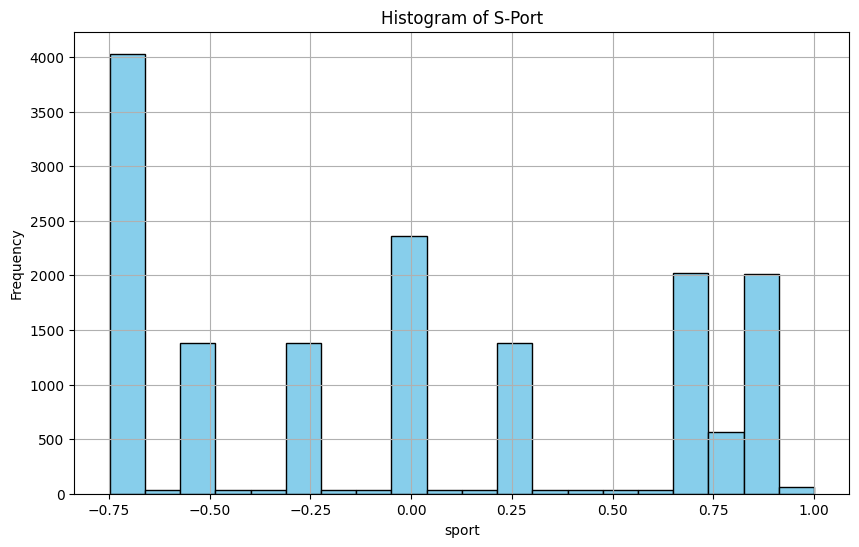

In [ ]:
# plot an histogram on the dataset
plt.figure(figsize=(10, 6))
plt.hist(data['sport'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('sport')
plt.ylabel('Frequency')
plt.title('Histogram of S-Port')
plt.grid(True)
plt.show()


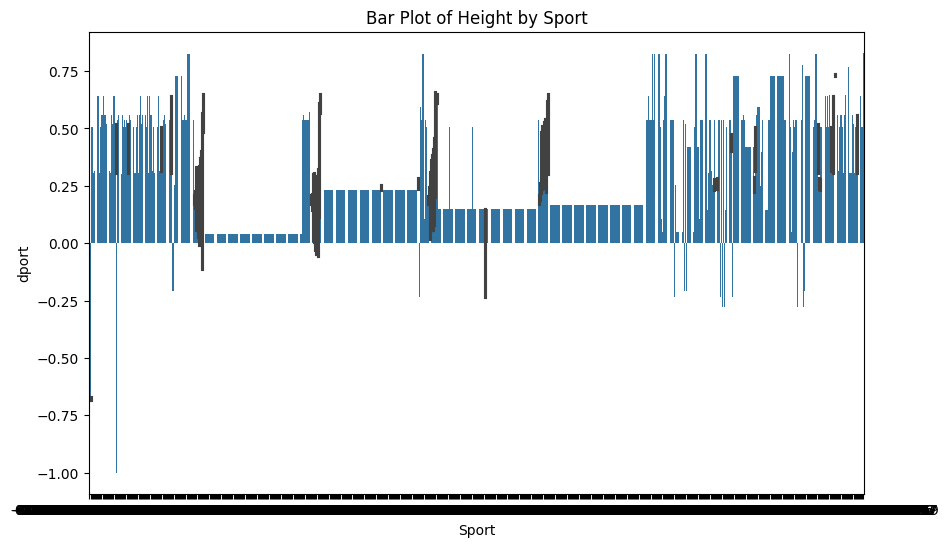

In [ ]:
# plot a barplot on the dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='sport', y='dport', data=data) # Replace 'height' with the column you want on the y-axis
plt.xlabel('Sport')
plt.ylabel('dport') # Update label as per y-axis column
plt.title('Bar Plot of Height by Sport')
plt.show()


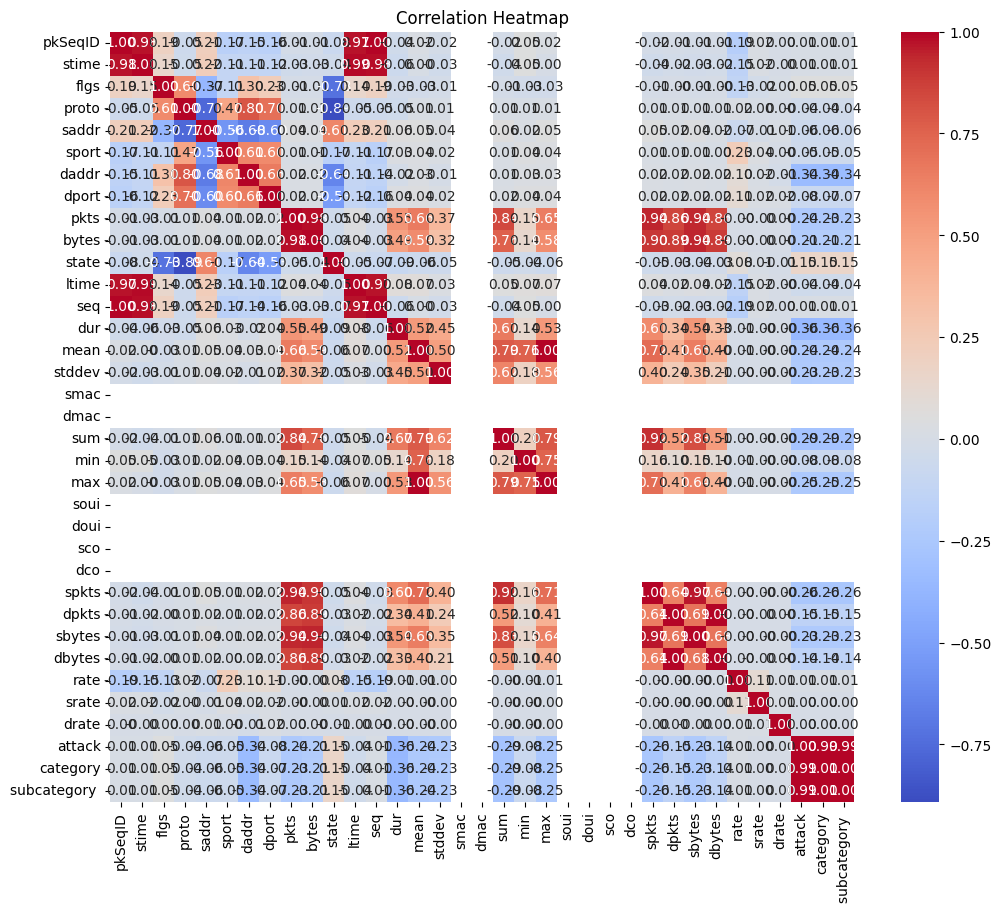

In [ ]:
# prompt: plot an heatmap for the dataset
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


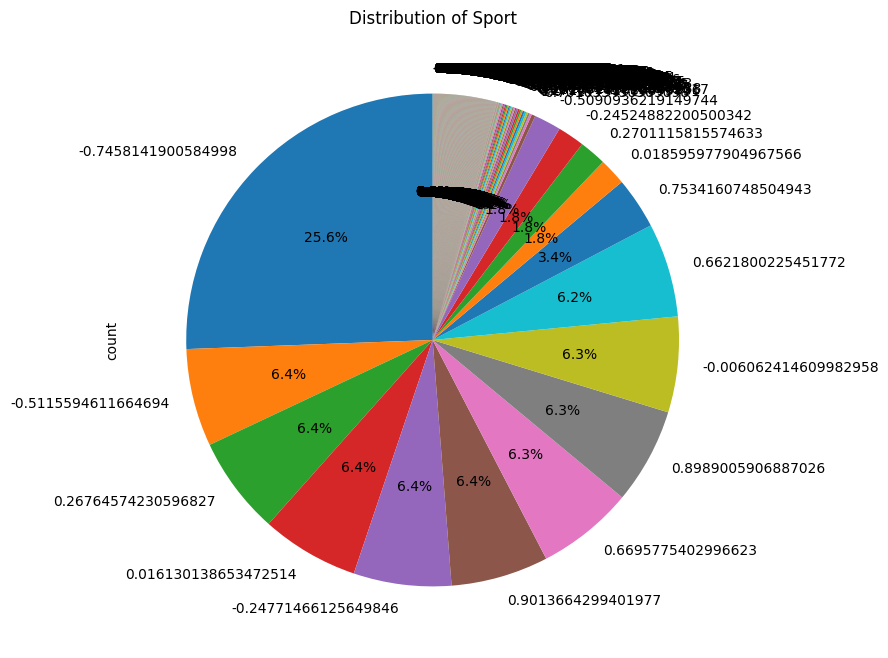

In [ ]:
# prompt: plot a piechart on the dataset
plt.figure(figsize=(8, 8))
data['sport'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sport')
plt.show()


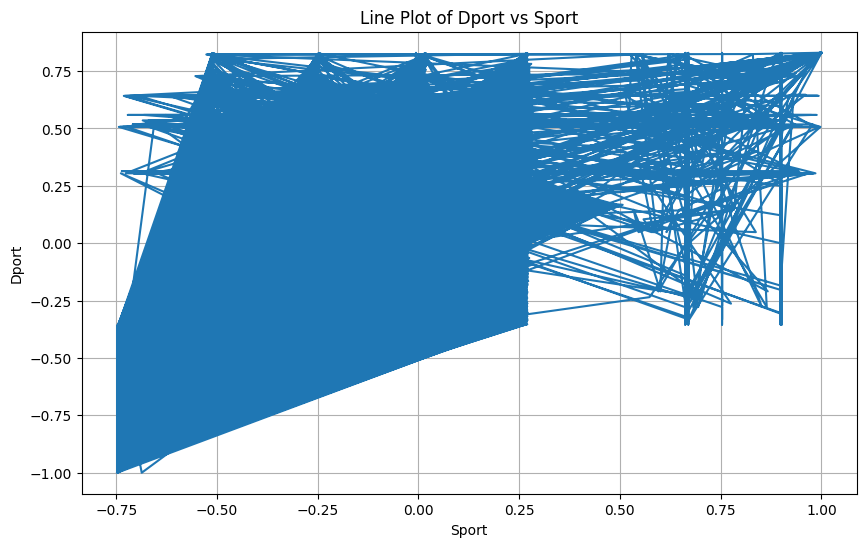

In [ ]:
# prompt: plot a line chart for the dataset
plt.figure(figsize=(10, 6))
plt.plot(data['sport'], data['dport'])  # Replace 'dport' with the column you want to plot against 'sport'
plt.xlabel('Sport')
plt.ylabel('Dport')  # Update label as per y-axis column
plt.title('Line Plot of Dport vs Sport')
plt.grid(True)
plt.show()


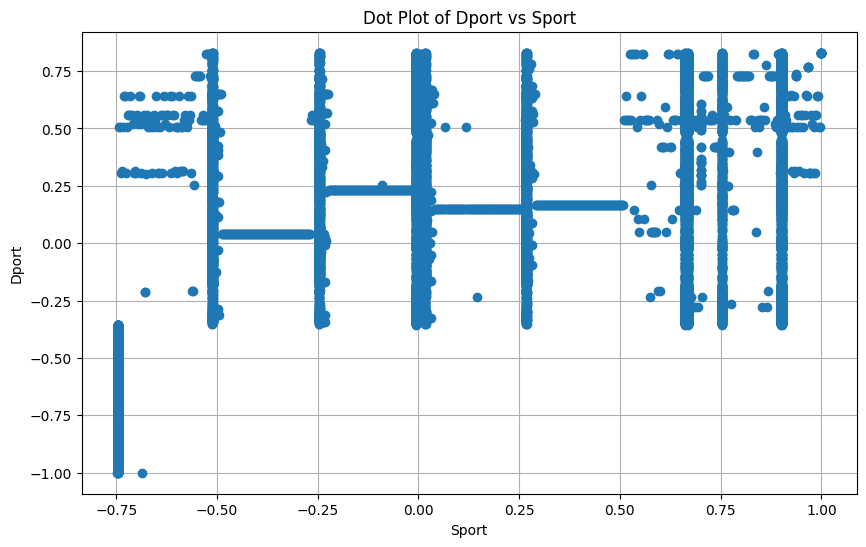

In [ ]:
# plot a dot chart for the dataset

plt.figure(figsize=(10, 6))
plt.plot(data['sport'], data['dport'], 'o')  # Use 'o' for a dot plot
plt.xlabel('Sport')
plt.ylabel('Dport')
plt.title('Dot Plot of Dport vs Sport')
plt.grid(True)
plt.show()


# Filter Feature Selection Techniques

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Select numeric features only
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool']).copy()

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64', 'bool']).copy()
if 'sport' not in numeric_data.columns:
    numeric_data['sport'] = data['sport']
le = LabelEncoder()
numeric_data['sport'] = le.fit_transform(numeric_data['sport'])

In [ ]:
# Separate features and target
X = numeric_data.drop(columns=['sport']) # Changed 'Legendary Status' to 'legendary_status'
y = numeric_data['sport'] # Changed 'Legendary Status' to 'legendary_status'

In [ ]:
# 1. Correlation Matrix
correlation_matrix = X.corrwith(y).sort_values(ascending=False)

In [ ]:
# 2. Chi-Square Test (features must be non-negative)
# Replace NaN values with 0 before applying chi2
X.fillna(0, inplace=True)  # or any other suitable imputation strategy
# Convert negative values to positive for chi2
X = np.abs(X)
chi2_scores, chi2_p = chi2(X, y)

In [ ]:
# 3. ANOVA F-test
f_scores, f_p = f_classif(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [15 16 20 21 22 23] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# 4. Mutual Information
mutual_info = mutual_info_classif(X, y)

In [ ]:
# 5. Variance Threshold
vt = VarianceThreshold()
vt.fit(X)
variances = vt.variances_

In [ ]:
# Combine results into a DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlation_matrix.values,
    'Chi2 Score': chi2_scores,
    'ANOVA F-Score': f_scores,
    'Mutual Info': mutual_info,
    'Variance': variances
}).sort_values(by='Correlation', ascending=False)

feature_scores.reset_index(drop=True, inplace=True)
feature_scores

,Feature,Correlation,Chi2 Score,ANOVA F-Score,Mutual Info,Variance
0,pkSeqID,0.613269,1734.405579,4.206749e+01,0.834954,0.083344
1,stime,0.600320,988.675061,2.204171e+01,1.278570,0.060636
2,flgs,0.473747,1499.454060,5.118647e+01,0.414577,0.075610
3,proto,0.227718,2674.534067,1.235935e+05,1.116215,0.057577
4,saddr,0.043408,721.526073,7.918219e+02,1.602936,0.005813
5,daddr,0.037755,628.173030,7.988589e+01,0.602091,0.003788
6,dport,0.036916,928.846420,1.215839e+01,0.387599,0.070034
7,pkts,0.036856,4803.637362,1.405185e+02,0.669026,0.000173
8,bytes,0.031067,4798.229013,9.281505e+01,1.090108,0.000158
9,state,0.022603,943.543614,2.134850e+03,1.098119,0.020442


# Wrapper Feature Selection Techniques


In [ ]:
# forward selection technique on the dataset
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
sfs = SequentialFeatureSelector(estimator, n_features_to_select=5, direction='forward', cv=5) # Adjust n_features_to_select
sfs.fit(X, y)
selected_features = X.columns[sfs.get_support()]
print("Selected Features:", selected_features)
X_selected = sfs.transform(X)
selected_model = LogisticRegression(max_iter=1000)
selected_model.fit(X_selected, y)



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# backward elimination technique on the dataset

import statsmodels.api as sm

def backward_elimination(X, y, significance_level=0.05):
    # Adding a constant to the independent variables
    X = sm.add_constant(X)

    # Initializing the list of features
    features = list(X.columns)

    while True:
        # Fitting the model with all current features
        model = sm.OLS(y, X[features]).fit()

        # Finding the feature with the highest p-value
        p_values = model.pvalues.drop("const")  # Exclude the constant term
        max_p_value = max(p_values)

        # Checking if the max p-value is above the significance level
        if max_p_value > significance_level:
            # Removing the feature with the highest p-value
            feature_to_remove = p_values.idxmax()
            features.remove(feature_to_remove)
        else:
            break

    return features, model

# Assuming X and y are defined from previous code (numeric_data)
features, model = backward_elimination(X, y)

print("Selected Features (Backward Elimination):", features)
print(model.summary())


Selected Features (Backward Elimination): ['const', 'stime', 'flgs', 'proto', 'saddr', 'pkts', 'bytes', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'smac', 'dmac', 'sum', 'max', 'soui', 'doui', 'sco', 'dco', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'drate', 'category', 'subcategory ']
                            OLS Regression Results                            
Dep. Variable:                  sport   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     3255.
Date:                Tue, 22 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:04:02   Log-Likelihood:                -95223.
No. Observations:               15601   AIC:                         1.905e+05
Df Residuals:                   15580   BIC:                         1.906e+05
Df Model:                          20                                         
C

# Embadded Feature Selection Technique


In [ ]:
# Before running lasso regression, print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# If X is empty (0 rows), you need to revisit your previous steps
# to figure out where the data is being removed.

# If the shape looks correct, you might be encountering a different issue.
# Check if X contains only NaNs or infinite values, and handle them accordingly:

# For NaNs:
X.fillna(X.mean(), inplace=True)  # Or any other imputation strategy

# For infinite values:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)  # Or any other imputation strategy

# After checking and handling these issues, try fitting the Lasso model again.
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # Adjust alpha for desired regularization strength
lasso.fit(X, y)
coefficients = lasso.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

feature_importance

Shape of X: (15601, 34)
Shape of y: (15601,)


,Feature,Coefficient
0,pkSeqID,-0.000000e+00
1,stime,4.283948e+02
2,flgs,-0.000000e+00
3,proto,-9.409237e+02
4,saddr,-1.824655e+02
5,daddr,-0.000000e+00
6,dport,-0.000000e+00
7,pkts,-0.000000e+00
8,bytes,-0.000000e+00
9,state,-0.000000e+00


In [ ]:
# apply the ridge reguralization on the dataset
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1) # Adjust alpha for desired regularization strength
ridge.fit(X, y)
coefficients = ridge.coef_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

feature_importance


,Feature,Coefficient
0,pkSeqID,-9.864588
1,stime,1120.577126
2,flgs,-4.148030
3,proto,-933.108074
4,saddr,-207.436984
5,daddr,-45.557351
6,dport,1.523169
7,pkts,69.806768
8,bytes,-20.617577
9,state,-45.398381
